# Energy Reconstruction Using CNN

In [6]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

from tensorflow.keras.callbacks import ModelCheckpoint

from data_tools import load_preprocessed, dataPrep, nameModel

## FIX THIS!
simPrefix = os.getcwd()+'\\simdata'

## Data Input

In [2]:
x, y = load_preprocessed(simPrefix, 'train')

Percentage of events with a NaN: 2.68


In [3]:
print(x.shape)
print(y.keys())
# each station has 2 tanks, each tank has 2 DOMs (high/log gain)
# each tank measures charge and time
# each station gives 2 charges and 2 times, 4 pieces of data
# x: (num, i, j, data)
# charge measured in VEM, vertical equivalent muon

# 'dir' is true direction, rest of dir are reconstructed by simulations
# plane assumes shower is flat plane
# laputop performs likelihood analysis
# small compromises between

(549773, 10, 10, 4)
dict_keys(['comp', 'energy', 'dir', 'plane_dir', 'laputop_dir', 'small_dir'])


(54977300,)
404193


(array([4.3753712e+07, 8.5081000e+05, 1.2861020e+06, 1.0464960e+06,
        8.7215200e+05, 8.1043600e+05, 8.8325000e+05, 8.3876500e+05,
        6.8673900e+05, 5.4230400e+05, 4.3348300e+05, 3.5975900e+05,
        3.0330200e+05, 2.5937200e+05, 2.2181900e+05, 1.9147700e+05,
        1.6777000e+05, 1.4623300e+05, 1.2814500e+05, 1.1295900e+05,
        1.0114600e+05, 9.1613000e+04, 8.2745000e+04, 7.5113000e+04,
        6.8428000e+04, 6.2669000e+04, 5.4995000e+04, 5.0141000e+04,
        4.2110000e+04, 3.7714000e+04, 3.6397000e+04, 3.3408000e+04,
        3.0618000e+04, 2.7442000e+04, 2.5191000e+04, 2.2881000e+04,
        2.1131000e+04, 1.9179000e+04, 1.7584000e+04, 1.6431000e+04,
        1.4722000e+04, 1.3546000e+04, 1.2269000e+04, 1.1295000e+04,
        1.0321000e+04, 9.1580000e+03, 8.2680000e+03, 7.4880000e+03,
        6.8450000e+03, 6.1850000e+03, 5.4370000e+03, 4.6140000e+03,
        3.7910000e+03, 2.6380000e+03, 1.8270000e+03, 1.1740000e+03,
        1.0560000e+03, 1.1030000e+03, 1.0270000e

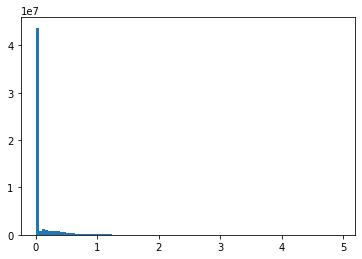

In [18]:
print(x[...,0].flatten().shape)
print(np.count_nonzero(x[...,0] > 1.5))
plt.hist(x[...,0].flatten(),bins=100)

In [ ]:
# 85/15 split for training/testing
energy = y['energy']
comp = y['comp']
theta, phi = y['dir'].transpose()
nevents = len(energy)
randSel = np.random.uniform(size=nevents)
trainCut = randSel < 0.7
valCut = np.logical_and(randSel>0.7,randSel<0.9)
testCut = randSel > 0.9

## Model Training

### Alpha Model
- Input: no charge merge, no time layers included, normalized data
- Layers: Two convolutional
- Output: Energy

In [ ]:
# Name for model
key = 'first_model'

# Data preparation: no merging of charge (q), no time layers included (t=False), data normalized from 0-1
prep = {'q':None, 't':False, 'normed':True}

In [ ]:
# Create model
model = Sequential(name=nameModel(prep, 'test'))  # Automatic naming for flexible assessment later
# Add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(10,10,2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(1)) # No activation function for last layer of regression model

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae','mse'])

In [ ]:
# Establish arrays to be trained on
x_i = dataPrep(x, y, **prep)
temp_y = energy

In [ ]:
# Train
history = model.fit(x_i[trainCut], temp_y[trainCut], validation_data=(x_i[valCut], temp_y[valCut]), epochs=3)

In [ ]:
# Save model to file for easy loading
## WHERE ARE YOU SAVING TO?
model.save('model_%s.h5' % key)
model.evaluate(x_i[testCut], temp_y[testCut])

## Your task

- **Create your own model**
- Replace the model here w/ *simplified* form of Brandon's model (focus: including zenith)
- change the zenith input to cosine(zenith) input

In [ ]:
history.history